In [1]:
import plotly.graph_objects as go
import pandas as pd 
import numpy as np

In [2]:
def generate_random_statement_df(num_quarters):

    # np.random.seed(101)
    quarters = pd.DataFrame( [ ('q'+str(q+1)) for q in range(num_quarters) ] )

    Sales = pd.DataFrame( np.round ( 1000 * np.random.randint(-1000,9999,(num_quarters,1)) / np.random.randint(-1000,9999,(num_quarters,1)), 2 ) )
    Expenses =  pd.DataFrame( np.round ( Sales * np.random.random(1) , 2) )
    OperatingProfit = pd.DataFrame(Sales - Expenses )
    NetProfit = pd.DataFrame( np.round ( OperatingProfit * np.random.random(1) , 2) )

    df = pd.concat([quarters, Sales, Expenses, OperatingProfit, NetProfit], axis=1)
    df.columns = [ "Quarter", "Sales", "Expenses", "Operating Profit", "Net Profit" ]

    return df.copy() 
    

In [3]:
df = generate_random_statement_df(4)
temp_df = df.set_index("Quarter")
temp_df

,Sales,Expenses,Operating Profit,Net Profit
Quarter,,,,
q1,3762.71,2972.31,790.40,382.20
q2,1286.36,1016.15,270.21,130.66
q3,2454.28,1938.73,515.55,249.30
q4,708.55,559.71,148.84,71.97


In [4]:
df

,Quarter,Sales,Expenses,Operating Profit,Net Profit
0,q1,3762.71,2972.31,790.40,382.20
1,q2,1286.36,1016.15,270.21,130.66
2,q3,2454.28,1938.73,515.55,249.30
3,q4,708.55,559.71,148.84,71.97


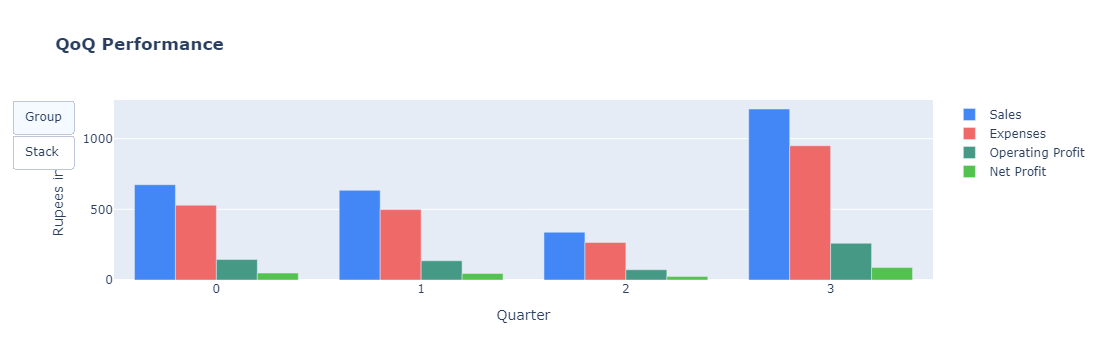

In [9]:
fig1 = go.Figure()

x  = temp_df.index
y1 = temp_df['Sales'].astype(float) # Sales Column
y2 = temp_df['Expenses'].astype(float) # Expenses Column
y3 = temp_df['Operating Profit'].astype(float) # Expenses Column
y4 = temp_df['Net Profit'].astype(float) # Expenses Column

fig1.add_trace(go.Bar(x=x, y=y1, name='Sales', marker_color ="#4287f5"))
fig1.add_trace(go.Bar(x=x, y=y2, name='Expenses', marker_color ="#f06969"))
fig1.add_trace(go.Bar(x=x, y=y3, name='Operating Profit', marker_color ="#469984"))
fig1.add_trace(go.Bar(x=x, y=y4, name='Net Profit', marker_color ="#53c24f"))

fig1.update_layout(
        title='<b>QoQ Performance</b>',
        xaxis_title='Quarter',
        yaxis_title='Rupees in Cr.')

updatemenus=[
    dict(
        type="buttons",
        buttons=list([
            dict(
                label="Group",
                method="relayout",
                args=[{"barmode": "group"}]
            ),
            dict(
                label="Stack",
                method="relayout",
                args=[{"barmode": "stack"}]
            )
        ])
    )
]

fig1.update_layout(updatemenus=updatemenus)
fig1.show()



In [10]:
def percentage_change(col1,col2):
    return ((col2 - col1) / col1) * 100

In [14]:
data = {
    'Quarter': ['q1', 'q2', 'q3', 'q4'],
    'Sales': [674.3, 634.32, 338.17, 1209.9],
    'Expenses': [529.47, 498.08, 265.54, 949.99],
    'Operating Profit': [144.83, 136.24, 72.63, 259.86],
    'Net Profit': [48.81, 45.91, 24.48, 87.57]
}
temp_df = pd.DataFrame(data)
temp_df

,Quarter,Sales,Expenses,Operating Profit,Net Profit
0,q1,674.30,529.47,144.83,48.81
1,q2,634.32,498.08,136.24,45.91
2,q3,338.17,265.54,72.63,24.48
3,q4,1209.90,949.99,259.86,87.57


0           NaN
1     -5.929112
2    -46.687792
3    257.778632
Name: Sales, dtype: float64